In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import scikitplot as skplt
import seaborn as sns
import sklearn.tree as tree
import statsmodels.api as sm
import plotly.graph_objects as go
import statsmodels.formula.api as smf
from scipy.stats import ttest_rel
from matplotlib import pyplot

In [2]:
sales = pd.read_csv('retailsales.csv')
sales['date'] = pd.to_datetime(sales['date'])
sales = sales.set_index('date')
sales = sales.replace(0, np.nan)
sales_clean = sales[sales['sales'].notna()]
sales_clean

/Users/violetyoyo/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (10,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,product_id,store_id,sales,revenue,stock,price,promo_type_1,promo_bin_1,promo_type_2,promo_bin_2,promo_discount_2,promo_discount_type_2
date,,,,,,,,,,,,
2017-01-02,P0001,S0012,1.0,5.30,NaN,6.25,PR14,NaN,PR03,NaN,NaN,NaN
2017-01-02,P0001,S0013,2.0,10.59,NaN,6.25,PR14,NaN,PR03,NaN,NaN,NaN
2017-01-02,P0001,S0056,1.0,5.30,6.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN
2017-01-02,P0001,S0103,1.0,5.30,10.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN
2017-01-02,P0001,S0106,1.0,5.30,3.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-31,P0747,S0065,4.0,59.32,2.0,17.50,PR03,verylow,PR03,NaN,NaN,NaN
2019-10-31,P0747,S0082,1.0,18.56,9.0,21.90,PR14,NaN,PR03,NaN,NaN,NaN
2019-10-31,P0747,S0087,1.0,18.56,3.0,21.90,PR14,NaN,PR03,NaN,NaN,NaN


In [13]:
sales_df = sales_clean['sales'].copy()
result_df = sales_df.groupby([(sales_df.index.year),(sales_df.index.month)]).apply(np.sum)
result_df

date  date
2017  1       227749.584
      2       291119.054
      3       232344.429
      4       261522.274
      5       214037.844
      6       208024.868
      7       227654.857
      8       239152.442
      9       224433.537
      10      215012.960
      11      190926.072
      12      257875.738
2018  1       213187.366
      2       201253.665
      3       227305.333
      4       234149.348
      5       273454.900
      6       243482.948
      7       275990.739
      8       278733.338
      9       259776.256
      10      249079.163
      11      200164.430
      12      242273.252
2019  1       210465.468
      2       219196.388
      3       221580.187
      4       208555.605
      5       203264.033
      6       228094.121
      7       239418.333
      8       287130.713
      9       226550.815
      10      233646.762
Name: sales, dtype: float64

Text(0.5, 1.0, 'Sales')

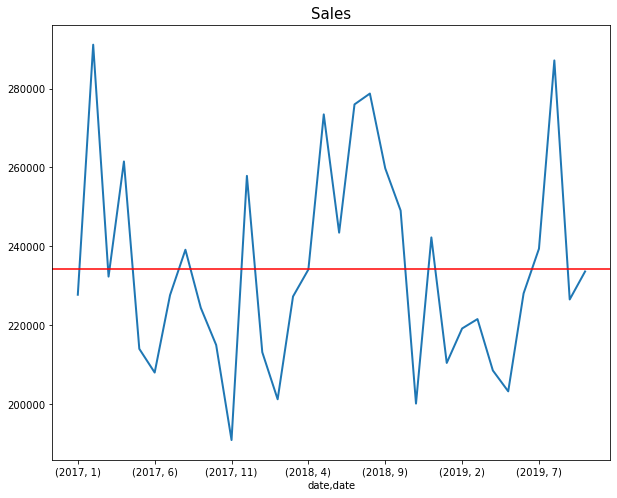

In [14]:
result_df.plot(figsize = (10,8), linewidth = 2)
plt.axhline(y = result_df.mean(), color = 'r', linestyle = '-')
plt.title('Sales',fontsize = 15)

In [17]:
sales_clean.index = pd.to_datetime(sales_clean.index)

In [32]:
tryout = sales_clean['store_id'].copy() 
tryout = tryout.groupby([(sales_df.index.year),(sales_df.index.month)])
tryout

In [9]:
sales_1 = sales_clean.loc[sales_clean.store_id == 'S0007']
sales_1

,product_id,store_id,sales,revenue,stock,price,promo_type_1,promo_bin_1,promo_type_2,promo_bin_2,promo_discount_2,promo_discount_type_2
date,,,,,,,,,,,,
2019-03-29,P0051,S0007,1.0,0.83,8.0,0.90,PR14,NaN,PR03,NaN,NaN,NaN
2019-03-29,P0103,S0007,2.0,7.31,7.0,3.95,PR14,NaN,PR03,NaN,NaN,NaN
2019-03-29,P0129,S0007,2.0,50.68,2.0,29.90,PR14,NaN,PR03,NaN,NaN,NaN
2019-03-29,P0185,S0007,1.0,0.75,NaN,0.75,PR14,NaN,PR03,NaN,NaN,NaN
2019-03-29,P0260,S0007,1.0,22.13,3.0,23.90,PR14,NaN,PR03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-31,P0500,S0007,1.0,7.41,33.0,12.00,PR09,low,PR03,NaN,NaN,NaN
2019-10-31,P0639,S0007,1.0,9.03,3.0,9.75,PR14,NaN,PR03,NaN,NaN,NaN
2019-10-31,P0664,S0007,3.0,4.86,2.0,1.75,PR14,NaN,PR03,NaN,NaN,NaN


In [10]:
sales_f = sales_1['sales'].copy()
result_f = sales_f.groupby([(sales_f.index.year),(sales_f.index.month)]).apply(np.sum)
result_f

date  date
2019  3        95.0
      4       762.0
      5       782.0
      6       605.0
      7       700.0
      8       666.0
      9       778.0
      10      850.0
Name: sales, dtype: float64